<a href="https://colab.research.google.com/github/piaizv/Colaboratory/blob/main/Introducci%C3%B3n_a_Redes_Neuronales%20hecho%20por%20Mateo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción a Redes Neuronales

Creado por Mateo Jesús Cabello Rodríguez

Las redes neuronales son una técnica de aprendizaje automático que se inspira en la forma en que funciona el cerebro humano. Una red neuronal está compuesta por capas de neuronas interconectadas que procesan la información a medida que se mueve a través de la red. Cada neurona en una capa se conecta con todas las neuronas en la capa siguiente y utiliza una función de activación para determinar si debe activarse o no.

Las redes neuronales se pueden utilizar para una variedad de tareas de aprendizaje automático, como clasificación, regresión, procesamiento de lenguaje natural y visión por computadora. Keras es una biblioteca de aprendizaje profundo que proporciona una API fácil de usar para construir redes neuronales.

# Configuración
Antes de empezar, asegúrate de tener instalado Python y la biblioteca Keras en tu computadora. Para instalar Keras, puedes utilizar pip, el administrador de paquetes de Python:

In [ ]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


También necesitarás otras bibliotecas como NumPy y Matplotlib para manipulación de datos y visualización de resultados. Puedes instalarlos con pip:

In [ ]:
pip install numpy matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Ejemplo: Clasificación de Imágenes
En este tutorial, construiremos una red neuronal para clasificar imágenes de dígitos escritos a mano. Utilizaremos el conjunto de datos MNIST, que contiene 60,000 imágenes de entrenamiento y 10,000 imágenes de prueba.

## Importar bibliotecas
Primero, importaremos las bibliotecas necesarias y cargaremos los datos de entrenamiento y prueba de MNIST utilizando la biblioteca Keras:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.utils import np_utils

# Cargar los datos de entrenamiento y prueba de MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

El conjunto de datos "MNIST" es uno de los conjuntos de datos más populares en el aprendizaje profundo y la visión por computadora. Contiene imágenes de números escritos a mano, cada una etiquetada con el dígito que representa. El conjunto de datos MNIST consiste en 70,000 imágenes de tamaño 28x28 píxeles, con 60,000 imágenes destinadas al entrenamiento del modelo y 10,000 imágenes para la evaluación.

El conjunto de datos MNIST se encuentra disponible en Keras como un conjunto de datos cargado por defecto, lo que significa que no necesitas descargar ni preparar el conjunto de datos por tu cuenta. Simplemente puedes importar el conjunto de datos desde el módulo keras.datasets y Keras cargará y preparará automáticamente el conjunto de datos para su uso en tu modelo.

Además de cargar el conjunto de datos MNIST, es importante visualizar algunos ejemplos de las imágenes de entrenamiento y prueba para tener una idea de cómo se ven los datos que el modelo utilizará. Para visualizar los datos de entrenamiento y prueba, podemos usar la biblioteca Matplotlib de Python. A continuación, se muestra un ejemplo de cómo visualizar algunos ejemplos de las imágenes de entrenamiento y prueba:

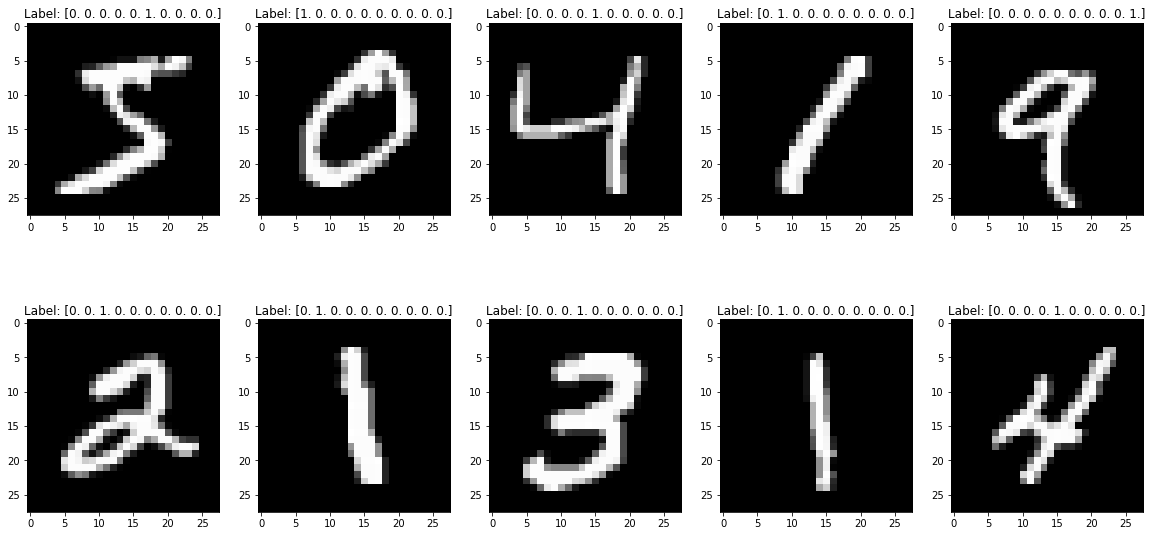

In [ ]:
# Visualizar algunos ejemplos de las imágenes de entrenamiento
fig, axs = plt.subplots(2, 5, figsize=(20, 10))
axs = axs.flatten()
for i in range(10):
    axs[i].imshow(X_train[i], cmap='gray')
    axs[i].set_title(f'Label: {y_train[i]}')
plt.show()

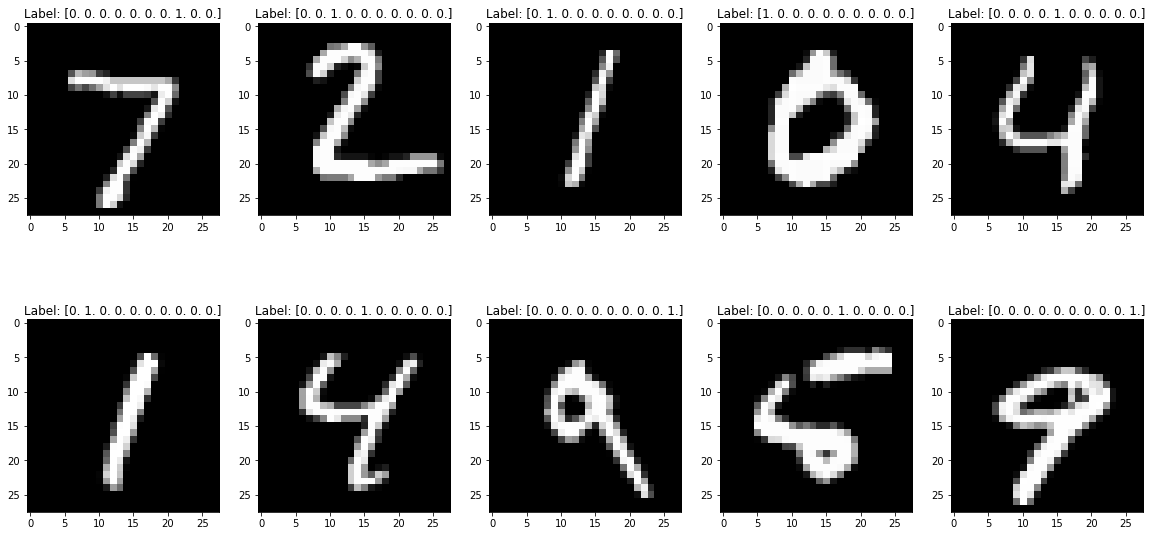

In [ ]:
# Visualizar algunos ejemplos de las imágenes de prueba
fig, axs = plt.subplots(2, 5, figsize=(20, 10))
axs = axs.flatten()
for i in range(10):
    axs[i].imshow(X_test[i], cmap='gray')
    axs[i].set_title(f'Label: {y_test[i]}')
plt.show()

Este código generará dos conjuntos de subplots, cada uno con 5 imágenes. El primer conjunto de subplots muestra algunos ejemplos de las imágenes de entrenamiento y el segundo conjunto de subplots muestra algunos ejemplos de las imágenes de prueba. Cada imagen está etiquetada con su respectiva etiqueta de clase. La opción cmap='gray' se utiliza para mostrar las imágenes en escala de grises.

In [ ]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

## Preprocesamiento de datos
Antes de entrenar la red neuronal, necesitamos preprocesar los datos. Primero, normalizaremos los píxeles de imagen para que tengan valores entre 0 y 1 en lugar de 0 y 255. Luego, convertiremos las etiquetas de clase en un formato codificado de un solo vector utilizando la función np_utils.to_categorical() de Keras:

In [ ]:
# Normalizar los píxeles de imagen
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Codificar las etiquetas de clase
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Construir la red neuronal
A continuación, construiremos la red neuronal utilizando la clase Sequential de Keras. Esta clase nos permite crear una pila de capas de forma secuencial.

En nuestra red neuronal, tendremos una capa de entrada que aplanará la imagen de entrada de 28x28 píxeles en un vector de una sola dimensión de 784 píxeles. Luego, tendremos dos capas ocultas con 128 y 64 neuronas, respectivamente, seguidas de una capa de salida con 10 neuronas, una para cada clase.

Utilizaremos la función de activación ReLU en las capas ocultas y la función de activación softmax en la capa de salida. La función softmax asigna probabilidades a cada clase y se utiliza para la clasificación de múltiples clases.

También incluiremos una capa de abandono (Dropout) en cada capa oculta para evitar el sobreajuste. La capa de abandono apaga aleatoriamente un porcentaje de las neuronas en cada iteración de entrenamiento, lo que obliga a la red neuronal a aprender características más robustas en lugar de simplemente memorizar los datos de entrenamiento.

In [ ]:
# Crear un modelo de red neuronal
model = Sequential()

# Agregar una capa de entrada que aplane la imagen en un vector de una sola dimensión
model.add(Flatten(input_shape=X_train.shape[1:]))

# Agregar dos capas ocultas con la función de activación ReLU y la capa de abandono
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Agregar una capa de salida con la función de activación softmax
model.add(Dense(10, activation='softmax'))

## Compilar el modelo
Después de construir la red neuronal, debemos compilarla antes de entrenarla. Al compilar el modelo, debemos especificar la función de pérdida, el optimizador y las métricas que se utilizarán para evaluar el rendimiento del modelo.

Utilizaremos la función de pérdida categorical_crossentropy, que se utiliza comúnmente en la clasificación de múltiples clases, el optimizador adam, que es un algoritmo de optimización eficaz y las métricas accuracy, que nos indican la precisión de la clasificación.

In [ ]:
# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Entrenar el modelo
Una vez compilado el modelo, podemos entrenarlo en los datos de entrenamiento. Para hacerlo, utilizaremos la función fit() de Keras. Especificaremos el número de épocas de entrenamiento y el tamaño del lote (batch size), que indica el número de muestras que se procesan a la vez durante el entrenamiento.

In [ ]:
# Entrenar el modelo
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=128)

Epoch 1/20
469/469 [==============================] - 8s 15ms/step - loss: 0.7408 - accuracy: 0.7660 - val_loss: 0.2315 - val_accuracy: 0.9326
Epoch 2/20
469/469 [==============================] - 6s 12ms/step - loss: 0.3702 - accuracy: 0.8966 - val_loss: 0.1768 - val_accuracy: 0.9482
Epoch 3/20
469/469 [==============================] - 7s 14ms/step - loss: 0.3028 - accuracy: 0.9168 - val_loss: 0.1464 - val_accuracy: 0.9568
Epoch 4/20
469/469 [==============================] - 6s 13ms/step - loss: 0.2619 - accuracy: 0.9285 - val_loss: 0.1362 - val_accuracy: 0.9598
Epoch 5/20
469/469 [==============================] - 4s 8ms/step - loss: 0.2403 - accuracy: 0.9329 - val_loss: 0.1275 - val_accuracy: 0.9630
Epoch 6/20
469/469 [==============================] - 4s 8ms/step - loss: 0.2235 - accuracy: 0.9381 - val_loss: 0.1170 - val_accuracy: 0.9663
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2083 - accuracy: 0.9421 - val_loss: 0.1120 - val_accuracy: 0.9681
Ep

Durante el entrenamiento, el modelo ajustará los pesos de las neuronas para minimizar la función de pérdida en los datos de entrenamiento. También evaluaremos el rendimiento del modelo en los datos de prueba después de cada época de entrenamiento utilizando la función evaluate(). Esta función devuelve la pérdida del modelo y las métricas especificadas durante la compilación.

In [ ]:
# Evaluar el rendimiento del modelo en los datos de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Pérdida del modelo en los datos de prueba: {loss:.4f}")
print(f"Precisión del modelo en los datos de prueba: {accuracy:.4f}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0935 - accuracy: 0.9735
Pérdida del modelo en los datos de prueba: 0.0935
Precisión del modelo en los datos de prueba: 0.9735


## Visualización de resultados
Podemos visualizar la precisión y la pérdida del modelo durante el entrenamiento utilizando la biblioteca Matplotlib. Esto nos permite ver cómo se desempeña el modelo en los datos de entrenamiento y prueba a medida que avanza el entrenamiento.

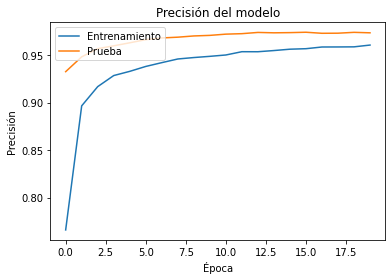

In [ ]:
# Graficar la precisión del modelo durante el entrenamiento
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Precisión del modelo')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Prueba'], loc='upper left')
plt.show()

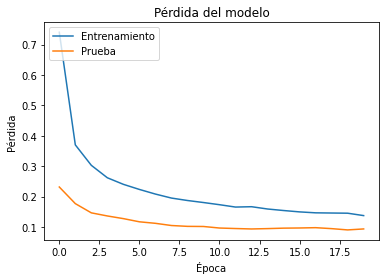

In [ ]:
# Graficar la pérdida del modelo durante el entrenamiento
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Prueba'], loc='upper left')
plt.show()

## Visualización del modelo
Para visualizar el modelo y sus neuronas con matplotlib podemos utilizar la función plot_model de Keras, que nos permite generar una imagen del modelo. Además, también podemos utilizar la librería pyplot de matplotlib para visualizar la estructura del modelo y sus neuronas.

Para utilizar plot_model, debemos importar la función desde Keras y luego llamarla con nuestro modelo como argumento. Por ejemplo:

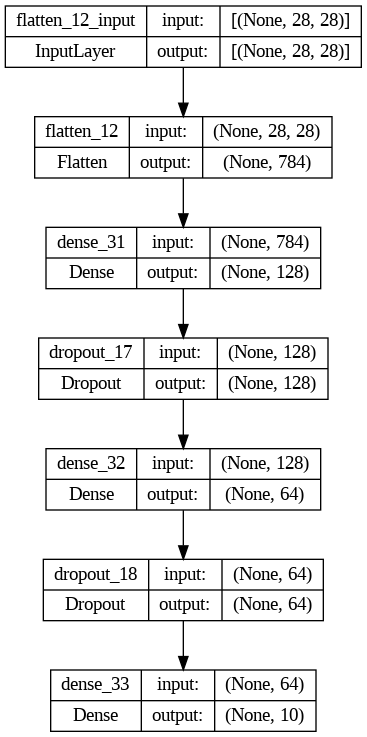

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

Esto generará una imagen del modelo en un archivo llamado "model.png" y mostrará las formas y nombres de las capas.

Para visualizar la estructura del modelo y sus neuronas utilizando pyplot, podemos hacer lo siguiente:

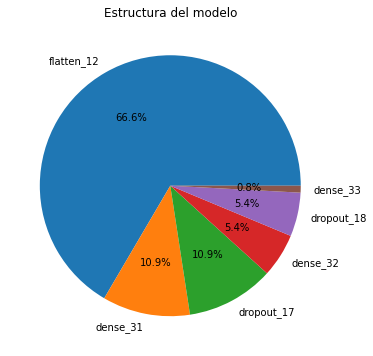

In [ ]:
import matplotlib.pyplot as plt

# Obtener la estructura del modelo
model_layers = [layer.output for layer in model.layers]
layer_names = [layer.name for layer in model.layers]

# Crear el diagrama
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title('Estructura del modelo')
ax.axis('off')
_ = plt.pie([layer.shape[-1] for layer in model_layers], labels=layer_names, autopct='%1.1f%%')
plt.show()

Esto creará un diagrama circular con las capas del modelo, donde cada porción del círculo representa el número de neuronas en cada capa. Podemos ajustar el tamaño del diagrama cambiando el parámetro figsize de subplots.

# Recomendaciones de Optimización

1. **Tamaño del lote (batch size)**: Un tamaño de lote adecuado depende del tamaño del conjunto de datos y la cantidad de memoria disponible. Si tienes un conjunto de datos grande y suficiente memoria, puedes aumentar el tamaño del lote para acelerar el entrenamiento. Por ejemplo, si tienes 100,000 imágenes en un conjunto de datos, un tamaño de lote de 128 sería adecuado para la mayoría de las configuraciones de hardware. Pero si tienes suficiente memoria y hardware adecuado, podrías usar un tamaño de lote de 512 o incluso 1024 para acelerar el entrenamiento. Aquí hay un ejemplo de cómo establecer el tamaño del lote en Keras:
```
batch_size = 128
model.fit(X_train, y_train, batch_size=batch_size, epochs=10)
```
2. **Número de épocas**: El número de épocas depende del tamaño del conjunto de datos y la complejidad del modelo. Si el modelo es demasiado simple, puede necesitar más épocas para converger, mientras que un modelo demasiado complejo puede requerir menos épocas. También es importante evitar el sobreajuste, por lo que puede ser necesario reducir el número de épocas. Por ejemplo, aquí está cómo establecer el número de épocas en Keras:
```
epochs = 10
model.fit(X_train, y_train, batch_size=128, epochs=epochs)
```
3. **Función de pérdida**: La función de pérdida debe elegirse en función del problema de aprendizaje automático. Para un problema de clasificación binaria, la función de pérdida comúnmente utilizada es "binary_crossentropy". Para un problema de clasificación múltiple, la función de pérdida "categorical_crossentropy" suele ser la mejor opción. Aquí hay un ejemplo de cómo especificar la función de pérdida en Keras:
```
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
```
4. **Optimizador**: El optimizador utilizado depende del problema de aprendizaje automático. El algoritmo "Adam" es el optimizador predeterminado en Keras y es una buena opción para la mayoría de los problemas. Sin embargo, hay otros optimizadores disponibles que pueden ser más efectivos para ciertos problemas. Por ejemplo, el optimizador "RMSprop" puede ser mejor para problemas de redes neuronales recurrentes. Aquí hay un ejemplo de cómo especificar el optimizador en Keras:
```
from keras.optimizers import Adam, RMSprop
optimizer = Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
```
5. **Regularización**: La regularización es una técnica para reducir el sobrefitado en la red neuronal. Una forma común de regularización es la técnica "dropout", que elimina aleatoriamente las neuronas durante el entrenamiento. Aquí hay un ejemplo de cómo agregar dropout a una red neuronal en Keras:
```
from keras.layers import Dropout
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
```
6. **Aumento de datos**: El aumento de datos es una técnica que se utiliza para aumentar la cantidad de datos de entrenamiento mediante la creación de nuevas instancias de entrenamiento a partir de las instancias de entrenamiento existentes. Esto ayuda a reducir el sobreajuste y mejorar el rendimiento del modelo. Keras proporciona una variedad de herramientas para la realización de aumentos de datos, como la rotación, el zoom, el desplazamiento, etc. Aquí hay un ejemplo de cómo realizar el aumento de datos en Keras:
```
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
   rotation_range=20,
   width_shift_range=0.1,
   height_shift_range=0.1,
   shear_range=0.2,
   zoom_range=0.2,
   horizontal_flip=True,
   fill_mode='nearest')
```
7. **Inicialización de pesos**: La inicialización de pesos es una técnica para inicializar los pesos de la red neuronal con valores adecuados. La elección de la técnica de inicialización de pesos depende del tipo de capa. Por ejemplo, las capas de activación "tanh" y "sigmoid" se inicializan comúnmente con la técnica "glorot", mientras que las capas de activación "ReLU" se inicializan mejor con la técnica "He". Aquí hay un ejemplo de cómo inicializar los pesos de una capa en Keras:
```
from keras.initializers import GlorotNormal, HeNormal
model.add(Dense(64, activation='relu', kernel_initializer=HeNormal()))
```

# Profundizar en la construcción y entrenamiento de redes neuronales con Keras en Python
Ahora vamos a profundizar en la construcción y entrenamiento de redes neuronales con Keras en Python.

Vamos a cubrir los siguientes puntos:

* Capas avanzadas: dropout, batch normalization y más
* Funciones de activación avanzadas: ReLU, LeakyReLU y más
* Optimizadores avanzados: RMSprop, Adam y más
* Regularización avanzada: L1, L2 y más
* Reducción del learning rate para mejorar el entrenamiento
* Early stopping para evitar el sobreajuste

## Capas avanzadas
Las capas avanzadas en Keras nos permiten construir redes neuronales más complejas y efectivas. Algunas de las capas más utilizadas son:

* Dropout: Esta capa se utiliza para evitar el sobreajuste. El dropout desactiva aleatoriamente algunas de las neuronas durante el entrenamiento, lo que hace que la red neuronal sea más robusta y menos sensible a las entradas específicas de los datos.

* BatchNormalization: Esta capa normaliza las activaciones de la capa anterior. Esto ayuda a reducir la covariación entre las capas y a acelerar el entrenamiento.

* Conv2DTranspose: Esta capa se utiliza para la construcción de redes neuronales generativas. Es la capa de convolución inversa que toma un tensor de baja dimensión y lo convierte en uno de alta dimensión.

* MaxPooling2D: Esta capa reduce la dimensión espacial de los mapas de características. Esto reduce la cantidad de parámetros y el costo computacional, lo que acelera el entrenamiento.

* GlobalMaxPooling2D: Esta capa realiza una reducción global de la dimensionalidad. Es útil para la clasificación de imágenes en las que la posición de los objetos no es importante.

* Flatten: Esta capa se utiliza para aplanar los datos de entrada de una red neuronal. Convierte una entrada de alta dimensión, como una imagen, en una matriz unidimensional para que pueda ser procesada por una capa densa o totalmente conectada. Es comúnmente utilizada en la construcción de redes neuronales convolucionales, ya que las capas convolucionales producen mapas de características tridimensionales que deben ser aplanados antes de ser alimentados a una capa densa. La capa Flatten no tiene parámetros entrenables y simplemente reformatea los datos de entrada.

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [ ]:
# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Entrenar el modelo
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=128, use_multiprocessing=True)

Epoch 1/5
469/469 [==============================] - 64s 130ms/step - loss: 0.3070 - accuracy: 0.9058 - val_loss: 0.0618 - val_accuracy: 0.9812
Epoch 2/5
469/469 [==============================] - 57s 122ms/step - loss: 0.0975 - accuracy: 0.9716 - val_loss: 0.0457 - val_accuracy: 0.9843
Epoch 3/5
469/469 [==============================] - 63s 134ms/step - loss: 0.0760 - accuracy: 0.9775 - val_loss: 0.0374 - val_accuracy: 0.9875
Epoch 4/5
469/469 [==============================] - 55s 118ms/step - loss: 0.0603 - accuracy: 0.9824 - val_loss: 0.0302 - val_accuracy: 0.9893
Epoch 5/5
469/469 [==============================] - 57s 122ms/step - loss: 0.0512 - accuracy: 0.9847 - val_loss: 0.0268 - val_accuracy: 0.9903


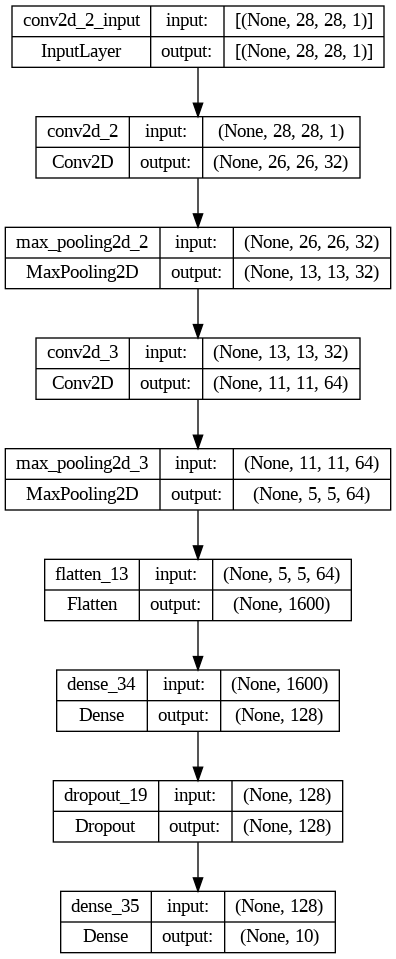

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

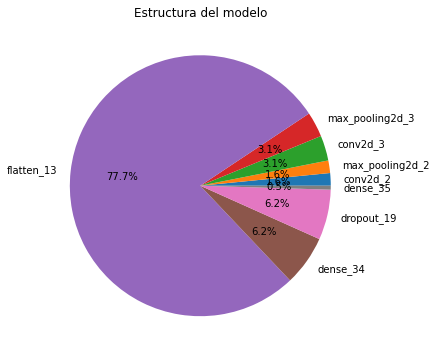

In [ ]:
import matplotlib.pyplot as plt

# Obtener la estructura del modelo
model_layers = [layer.output for layer in model.layers]
layer_names = [layer.name for layer in model.layers]

# Crear el diagrama
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title('Estructura del modelo')
ax.axis('off')
_ = plt.pie([layer.shape[-1] for layer in model_layers], labels=layer_names, autopct='%1.1f%%')
plt.show()

In [ ]:
# Evaluar el rendimiento del modelo en los datos de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Pérdida del modelo en los datos de prueba: {loss:.4f}")
print(f"Precisión del modelo en los datos de prueba: {accuracy:.4f}")

313/313 [==============================] - 3s 10ms/step - loss: 0.0268 - accuracy: 0.9903
Pérdida del modelo en los datos de prueba: 0.0268
Precisión del modelo en los datos de prueba: 0.9903


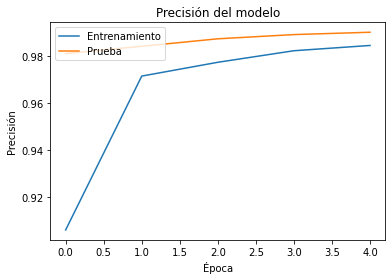

In [ ]:
# Graficar la precisión del modelo durante el entrenamiento
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Precisión del modelo')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Prueba'], loc='upper left')
plt.show()

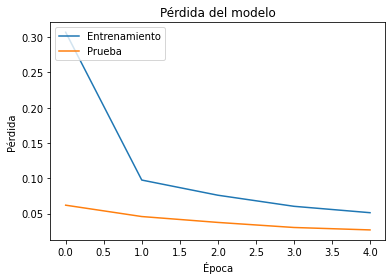

In [ ]:
# Graficar la pérdida del modelo durante el entrenamiento
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Prueba'], loc='upper left')
plt.show()

En este ejemplo, utilizamos una capa Conv2D y una capa MaxPooling2D para extraer características de las imágenes en el conjunto de datos MNIST. También utilizamos una capa Flatten para aplanar las características extraídas en un vector y una capa Dropout para regularizar el modelo y reducir el sobreajuste.

## Funciones de activación avanzadas
Las funciones de activación son esenciales en las redes neuronales porque determinan la no linealidad de la red. Algunas de las funciones de activación más utilizadas son:

* ReLU: Esta función de activación es la más utilizada en la actualidad debido a su simplicidad y eficacia. ReLU es una función no lineal que mapea cualquier entrada negativa a cero y cualquier entrada positiva a su valor de entrada.

* LeakyReLU: Esta función de activación es similar a ReLU, pero en lugar de mapear las entradas negativas a cero, mapea las entradas negativas a un valor pequeño y positivo.

* ELU: Esta función de activación es similar a ReLU, pero en lugar de mapear las entradas negativas a cero, mapea las entradas negativas a un valor exponencialmente decreciente.

In [ ]:
from keras.layers import LeakyReLU

model = Sequential()
model.add(Flatten(input_shape=(28, 28))) # Aplanar las imágenes
model.add(Dense(64))
model.add(LeakyReLU())
model.add(Dense(10, activation='softmax'))

In [ ]:
# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Entrenar el modelo
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=128, use_multiprocessing=True)

Epoch 1/20
469/469 [==============================] - 3s 5ms/step - loss: 0.4159 - accuracy: 0.8867 - val_loss: 0.2626 - val_accuracy: 0.9245
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2437 - accuracy: 0.9304 - val_loss: 0.2192 - val_accuracy: 0.9361
Epoch 3/20
469/469 [==============================] - 3s 7ms/step - loss: 0.2007 - accuracy: 0.9434 - val_loss: 0.1871 - val_accuracy: 0.9435
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1695 - accuracy: 0.9521 - val_loss: 0.1614 - val_accuracy: 0.9535
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1459 - accuracy: 0.9585 - val_loss: 0.1488 - val_accuracy: 0.9546
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1289 - accuracy: 0.9635 - val_loss: 0.1369 - val_accuracy: 0.9602
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1140 - accuracy: 0.9672 - val_loss: 0.1271 - val_accuracy: 0.9640
Epoch 

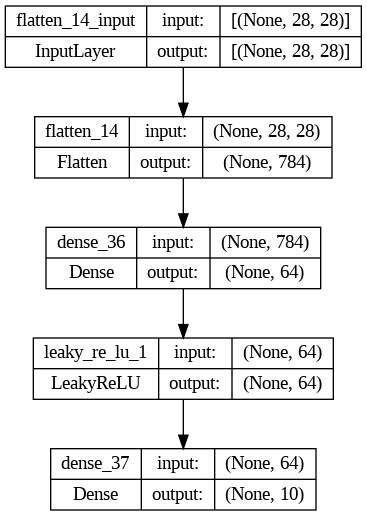

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

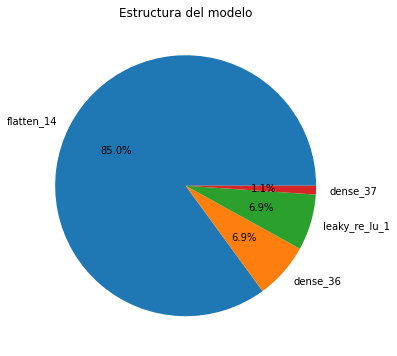

In [ ]:
import matplotlib.pyplot as plt

# Obtener la estructura del modelo
model_layers = [layer.output for layer in model.layers]
layer_names = [layer.name for layer in model.layers]

# Crear el diagrama
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title('Estructura del modelo')
ax.axis('off')
_ = plt.pie([layer.shape[-1] for layer in model_layers], labels=layer_names, autopct='%1.1f%%')
plt.show()

In [ ]:
# Evaluar el rendimiento del modelo en los datos de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Pérdida del modelo en los datos de prueba: {loss:.4f}")
print(f"Precisión del modelo en los datos de prueba: {accuracy:.4f}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0905 - accuracy: 0.9728
Pérdida del modelo en los datos de prueba: 0.0905
Precisión del modelo en los datos de prueba: 0.9728


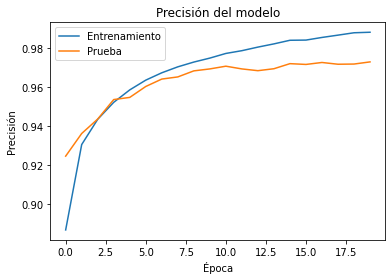

In [ ]:
# Graficar la precisión del modelo durante el entrenamiento
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Precisión del modelo')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Prueba'], loc='upper left')
plt.show()

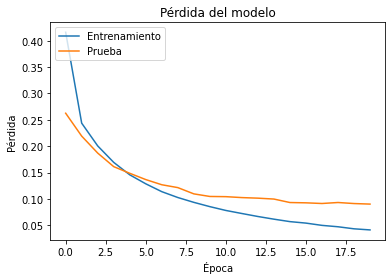

In [ ]:
# Graficar la pérdida del modelo durante el entrenamiento
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Prueba'], loc='upper left')
plt.show()

En este ejemplo, utilizamos una función de activación PReLU en lugar de la función de activación ReLU estándar. La función PReLU se ha demostrado que puede mejorar el rendimiento de la red neuronal en algunos conjuntos de datos.

## Optimizadores avanzados
Los optimizadores son algoritmos que se utilizan para ajustar los pesos de la red neuronal durante el entrenamiento. Algunos de los optimizadores más utilizados son:

* RMSprop: Este optimizador utiliza una media móvil de los cuadrados de los gradientes para normalizar el gradiente.

* Adam: Este optimizador utiliza una combinación de RMSprop y momentum para ajustar los pesos de la red neuronal. Es uno de los optimizadores más utilizados en la actualidad.

* SGD: Este es el optimizador de descenso de gradiente estocástico estándar. Aunque es menos utilizado en la actualidad, todavía puede ser útil en algunos casos.

In [ ]:
from keras.optimizers import Adam
from keras.layers import Activation

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Activation('relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

In [ ]:
# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Entrenar el modelo
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=128, use_multiprocessing=True)

Epoch 1/20
469/469 [==============================] - 2s 4ms/step - loss: 0.6853 - accuracy: 0.8291 - val_loss: 0.3834 - val_accuracy: 0.9029
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 0.3634 - accuracy: 0.9020 - val_loss: 0.3217 - val_accuracy: 0.9126
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 0.3199 - accuracy: 0.9126 - val_loss: 0.2978 - val_accuracy: 0.9182
Epoch 4/20
469/469 [==============================] - 2s 3ms/step - loss: 0.2996 - accuracy: 0.9170 - val_loss: 0.2847 - val_accuracy: 0.9206
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2882 - accuracy: 0.9197 - val_loss: 0.2796 - val_accuracy: 0.9237
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2802 - accuracy: 0.9212 - val_loss: 0.2732 - val_accuracy: 0.9240
Epoch 7/20
469/469 [==============================] - 2s 3ms/step - loss: 0.2740 - accuracy: 0.9237 - val_loss: 0.2698 - val_accuracy: 0.9249
Epoch 

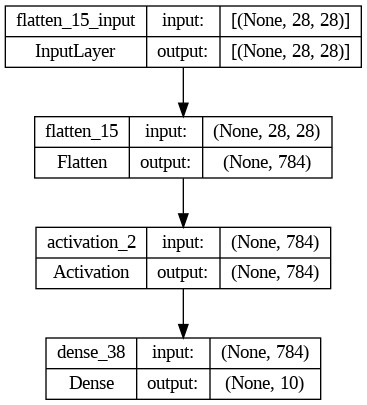

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

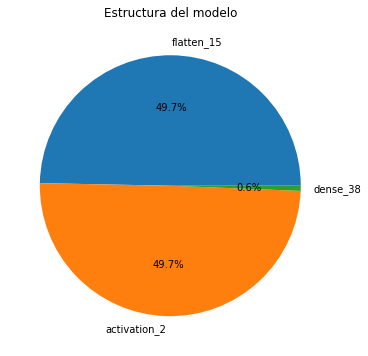

In [ ]:
import matplotlib.pyplot as plt

# Obtener la estructura del modelo
model_layers = [layer.output for layer in model.layers]
layer_names = [layer.name for layer in model.layers]

# Crear el diagrama
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title('Estructura del modelo')
ax.axis('off')
_ = plt.pie([layer.shape[-1] for layer in model_layers], labels=layer_names, autopct='%1.1f%%')
plt.show()

In [ ]:
# Evaluar el rendimiento del modelo en los datos de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Pérdida del modelo en los datos de prueba: {loss:.4f}")
print(f"Precisión del modelo en los datos de prueba: {accuracy:.4f}")

313/313 [==============================] - 1s 2ms/step - loss: 0.2621 - accuracy: 0.9282
Pérdida del modelo en los datos de prueba: 0.2621
Precisión del modelo en los datos de prueba: 0.9282


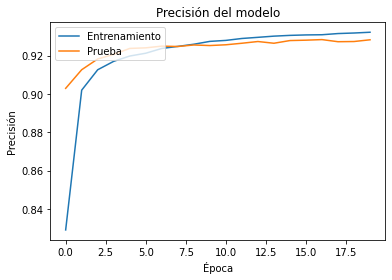

In [ ]:
# Graficar la precisión del modelo durante el entrenamiento
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Precisión del modelo')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Prueba'], loc='upper left')
plt.show()

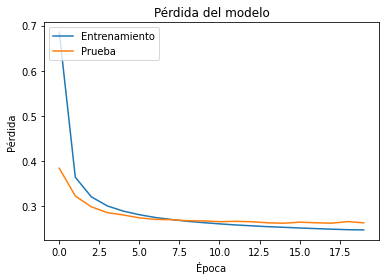

In [ ]:
# Graficar la pérdida del modelo durante el entrenamiento
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Prueba'], loc='upper left')
plt.show()

En este ejemplo, utilizamos el optimizador Adam en lugar del optimizador SGD estándar. El optimizador Adam se ha demostrado que converge más rápidamente que el SGD en muchos casos.

## Regularización avanzada
La regularización se utiliza para evitar el sobreajuste de la red neuronal. Algunas de las técnicas de regularización más utilizadas son:

* L1: Esta técnica de regularización agrega una penalización L1 a la función de pérdida. Esto hace que los pesos más pequeños sean más importantes y reduce la complejidad de la red.

* L2: Esta técnica de regularización agrega una penalización L2 a la función de pérdida. Esto hace que los pesos más grandes sean más importantes y reduce la complejidad de la red.

* Dropout: Como se mencionó anteriormente, el dropout es una técnica de regularización que desactiva aleatoriamente algunas de las neuronas durante el entrenamiento.

In [ ]:
from keras.regularizers import l2

model = Sequential()
model.add(Dense(64, kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [ ]:
# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Entrenar el modelo
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=128, use_multiprocessing=True)

Epoch 1/20
469/469 [==============================] - 5s 10ms/step - loss: 0.6662 - accuracy: 0.8737 - val_loss: 0.3761 - val_accuracy: 0.9222
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 0.3477 - accuracy: 0.9255 - val_loss: 0.3043 - val_accuracy: 0.9344
Epoch 3/20
469/469 [==============================] - 3s 7ms/step - loss: 0.2978 - accuracy: 0.9345 - val_loss: 0.2713 - val_accuracy: 0.9426
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 0.2694 - accuracy: 0.9409 - val_loss: 0.2521 - val_accuracy: 0.9444
Epoch 5/20
469/469 [==============================] - 4s 9ms/step - loss: 0.2504 - accuracy: 0.9445 - val_loss: 0.2357 - val_accuracy: 0.9490
Epoch 6/20
469/469 [==============================] - 3s 7ms/step - loss: 0.2354 - accuracy: 0.9479 - val_loss: 0.2237 - val_accuracy: 0.9503
Epoch 7/20
469/469 [==============================] - 3s 7ms/step - loss: 0.2233 - accuracy: 0.9504 - val_loss: 0.2167 - val_accuracy: 0.9502
Epoch

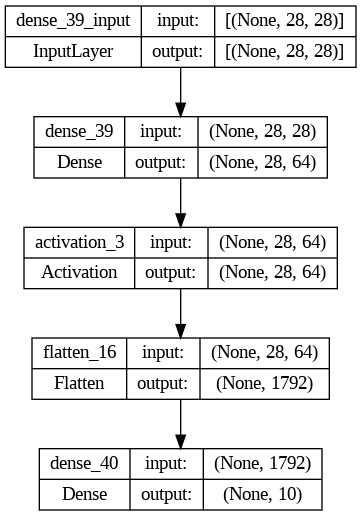

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

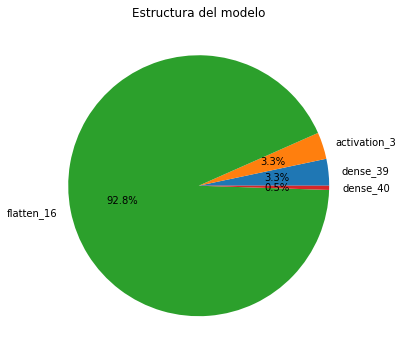

In [ ]:
import matplotlib.pyplot as plt

# Obtener la estructura del modelo
model_layers = [layer.output for layer in model.layers]
layer_names = [layer.name for layer in model.layers]

# Crear el diagrama
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title('Estructura del modelo')
ax.axis('off')
_ = plt.pie([layer.shape[-1] for layer in model_layers], labels=layer_names, autopct='%1.1f%%')
plt.show()

In [ ]:
# Evaluar el rendimiento del modelo en los datos de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Pérdida del modelo en los datos de prueba: {loss:.4f}")
print(f"Precisión del modelo en los datos de prueba: {accuracy:.4f}")

313/313 [==============================] - 1s 2ms/step - loss: 0.1646 - accuracy: 0.9609
Pérdida del modelo en los datos de prueba: 0.1646
Precisión del modelo en los datos de prueba: 0.9609


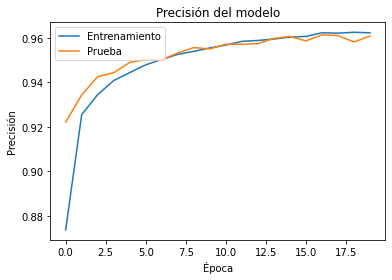

In [ ]:
# Graficar la precisión del modelo durante el entrenamiento
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Precisión del modelo')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Prueba'], loc='upper left')
plt.show()

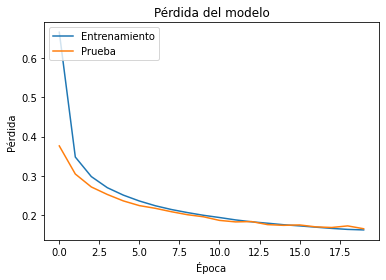

In [ ]:
# Graficar la pérdida del modelo durante el entrenamiento
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Prueba'], loc='upper left')
plt.show()

En este ejemplo, utilizamos una regularización L2 en la capa oculta de la red neuronal para reducir el sobreajuste. La regularización L2 agrega una penalización L2 a la función de pérdida.

## Early stopping para evitar el sobreajuste
El sobreajuste es un problema común en el entrenamiento de redes neuronales, en el cual el modelo se ajusta demasiado bien a los datos de entrenamiento y no generaliza bien a datos nuevos. Una forma de evitar este problema es utilizar early stopping, que detiene el entrenamiento del modelo cuando el error en los datos de validación comienza a aumentar.

Para implementar early stopping en Keras, podemos utilizar la clase EarlyStopping del módulo keras.callbacks. Esta clase tiene varios parámetros que podemos ajustar, como el número de épocas para esperar antes de detener el entrenamiento, el monitor para verificar el error en los datos de validación, el modo de comparación (por ejemplo, "min" para minimizar el error o "max" para maximizar la precisión), entre otros.

In [ ]:
from keras.callbacks import EarlyStopping

# Crear un modelo de red neuronal
model = Sequential()

# Agregar una capa de entrada que aplane la imagen en un vector de una sola dimensión
model.add(Flatten(input_shape=X_train.shape[1:]))

# Agregar dos capas ocultas con la función de activación ReLU y la capa de abandono
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Agregar una capa de salida con la función de activación softmax
model.add(Dense(10, activation='softmax'))

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# definir early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, mode='min')

# entrenar el modelo con early stopping
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=128, callbacks=[early_stop])


Epoch 1/20
469/469 [==============================] - 5s 8ms/step - loss: 0.7444 - accuracy: 0.7648 - val_loss: 0.2349 - val_accuracy: 0.9318
Epoch 2/20
469/469 [==============================] - 4s 8ms/step - loss: 0.3587 - accuracy: 0.8990 - val_loss: 0.1740 - val_accuracy: 0.9490
Epoch 3/20
469/469 [==============================] - 4s 8ms/step - loss: 0.2953 - accuracy: 0.9171 - val_loss: 0.1457 - val_accuracy: 0.9557
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 0.2554 - accuracy: 0.9286 - val_loss: 0.1308 - val_accuracy: 0.9604
Epoch 5/20
469/469 [==============================] - 3s 7ms/step - loss: 0.2425 - accuracy: 0.9324 - val_loss: 0.1248 - val_accuracy: 0.9643
Epoch 6/20
469/469 [==============================] - 4s 9ms/step - loss: 0.2180 - accuracy: 0.9371 - val_loss: 0.1155 - val_accuracy: 0.9654
Epoch 7/20
469/469 [==============================] - 3s 7ms/step - loss: 0.2049 - accuracy: 0.9431 - val_loss: 0.1064 - val_accuracy: 0.9693
Epoch 

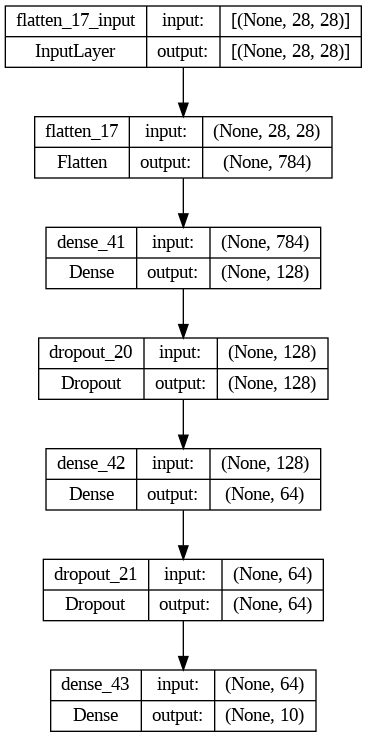

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

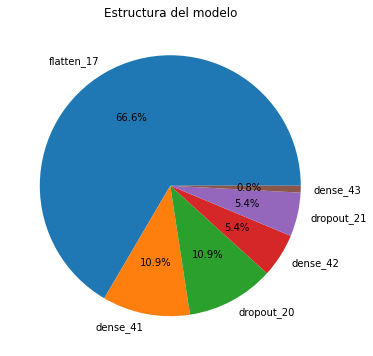

In [ ]:
import matplotlib.pyplot as plt

# Obtener la estructura del modelo
model_layers = [layer.output for layer in model.layers]
layer_names = [layer.name for layer in model.layers]

# Crear el diagrama
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title('Estructura del modelo')
ax.axis('off')
_ = plt.pie([layer.shape[-1] for layer in model_layers], labels=layer_names, autopct='%1.1f%%')
plt.show()

En este ejemplo, estamos deteniendo el entrenamiento cuando el error en los datos de validación (monitor='val_loss') no mejora después de 5 épocas (patience=5). Estamos utilizando el modo "min" para minimizar el error en los datos de validación.

In [ ]:
# Evaluar el rendimiento del modelo en los datos de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Pérdida del modelo en los datos de prueba: {loss:.4f}")
print(f"Precisión del modelo en los datos de prueba: {accuracy:.4f}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0898 - accuracy: 0.9750
Pérdida del modelo en los datos de prueba: 0.0898
Precisión del modelo en los datos de prueba: 0.9750


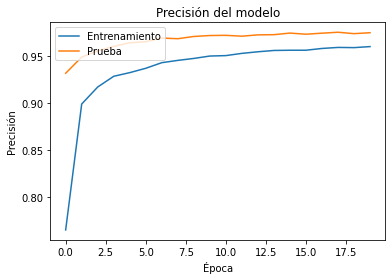

In [ ]:
# Graficar la precisión del modelo durante el entrenamiento
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Precisión del modelo')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Prueba'], loc='upper left')
plt.show()

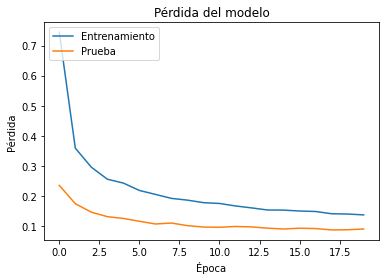

In [ ]:
# Graficar la pérdida del modelo durante el entrenamiento
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Prueba'], loc='upper left')
plt.show()

## Reducción del learning rate para mejorar el entrenamiento
Otro problema común en el entrenamiento de redes neuronales es la inestabilidad del proceso de aprendizaje, donde la función de pérdida oscila mucho durante el entrenamiento. Una forma de abordar este problema es reducir gradualmente el learning rate durante el entrenamiento.

En Keras, podemos utilizar la clase ReduceLROnPlateau del módulo keras.callbacks para reducir el learning rate cuando la función de pérdida en los datos de validación no mejora después de un número determinado de épocas. Esta clase tiene varios parámetros que podemos ajustar, como el factor de reducción del learning rate, el número de épocas para esperar antes de reducir el learning rate, el monitor para verificar el error en los datos de validación, entre otros.

In [ ]:
from keras.callbacks import ReduceLROnPlateau

# Crear un modelo de red neuronal
model = Sequential()

# Agregar una capa de entrada que aplane la imagen en un vector de una sola dimensión
model.add(Flatten(input_shape=X_train.shape[1:]))

# Agregar dos capas ocultas con la función de activación ReLU y la capa de abandono
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Agregar una capa de salida con la función de activación softmax
model.add(Dense(10, activation='softmax'))

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# definir reducción del learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, mode='min', min_lr=0.0001, verbose=1)

# entrenar el modelo con reducción del learning rate
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=128, callbacks=[reduce_lr])


Epoch 1/20
469/469 [==============================] - 5s 8ms/step - loss: 0.7453 - accuracy: 0.7662 - val_loss: 0.2385 - val_accuracy: 0.9286 - lr: 0.0010
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 0.3660 - accuracy: 0.8960 - val_loss: 0.1839 - val_accuracy: 0.9460 - lr: 0.0010
Epoch 3/20
469/469 [==============================] - 3s 7ms/step - loss: 0.2967 - accuracy: 0.9169 - val_loss: 0.1471 - val_accuracy: 0.9566 - lr: 0.0010
Epoch 4/20
469/469 [==============================] - 4s 9ms/step - loss: 0.2664 - accuracy: 0.9245 - val_loss: 0.1341 - val_accuracy: 0.9597 - lr: 0.0010
Epoch 5/20
469/469 [==============================] - 3s 7ms/step - loss: 0.2371 - accuracy: 0.9340 - val_loss: 0.1209 - val_accuracy: 0.9654 - lr: 0.0010
Epoch 6/20
469/469 [==============================] - 3s 7ms/step - loss: 0.2198 - accuracy: 0.9393 - val_loss: 0.1127 - val_accuracy: 0.9674 - lr: 0.0010
Epoch 7/20
469/469 [==============================] - 4s 8ms/step - lo

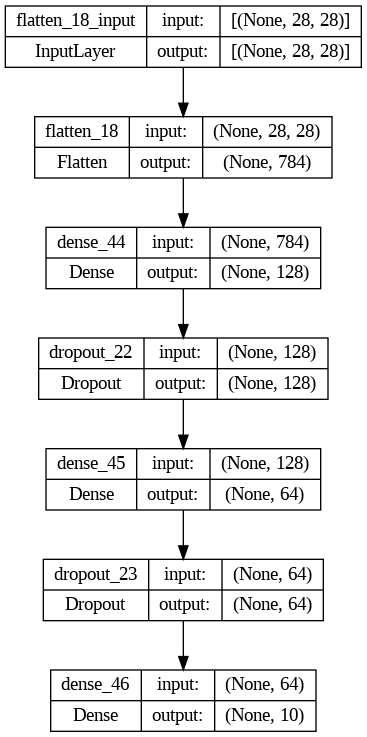

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

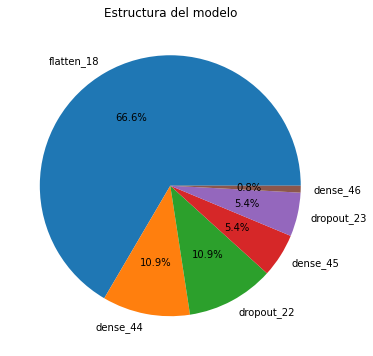

In [ ]:
import matplotlib.pyplot as plt

# Obtener la estructura del modelo
model_layers = [layer.output for layer in model.layers]
layer_names = [layer.name for layer in model.layers]

# Crear el diagrama
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title('Estructura del modelo')
ax.axis('off')
_ = plt.pie([layer.shape[-1] for layer in model_layers], labels=layer_names, autopct='%1.1f%%')
plt.show()

En este ejemplo, estamos reduciendo el learning rate en un factor de 0.1 cuando el error en los datos de validación (monitor='val_loss') no mejora después de 5 épocas (patience=5). 

Estamos utilizando el modo "min" para minimizar el error en los datos de validación. 

Estamos estableciendo un límite mínimo para el learning rate de 0.0001 (min_lr=0.0001).

Además, hemos establecido verbose=1 para imprimir un mensaje cuando se reduce el learning rate. Esto puede ser útil para monitorear el progreso del entrenamiento y asegurarse de que el modelo está mejorando correctamente.


In [ ]:
# Evaluar el rendimiento del modelo en los datos de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Pérdida del modelo en los datos de prueba: {loss:.4f}")
print(f"Precisión del modelo en los datos de prueba: {accuracy:.4f}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0857 - accuracy: 0.9759
Pérdida del modelo en los datos de prueba: 0.0857
Precisión del modelo en los datos de prueba: 0.9759


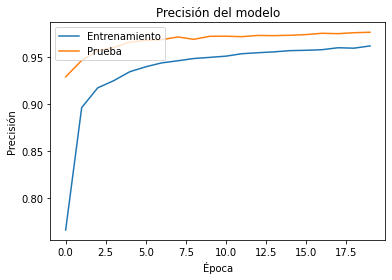

In [ ]:
# Graficar la precisión del modelo durante el entrenamiento
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Precisión del modelo')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Prueba'], loc='upper left')
plt.show()

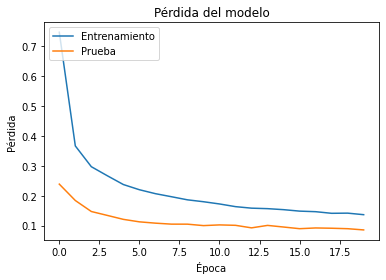

In [ ]:
# Graficar la pérdida del modelo durante el entrenamiento
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Prueba'], loc='upper left')
plt.show()

## Early stopping y Reducción del learning rate para mejorar el entrenamiento
Ambos procesos se pueden combinar en el módulo keras.callbacks para combinar ambas funcionalidades y tener un mayor control del sobreentrenamiento.

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam
# Crear un modelo de red neuronal
model = Sequential()

# Agregar una capa de entrada que aplane la imagen en un vector de una sola dimensión
model.add(Flatten(input_shape=X_train.shape[1:]))

# Agregar dos capas ocultas con la función de activación ReLU y la capa de abandono
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Agregar una capa de salida con la función de activación softmax
model.add(Dense(10, activation='softmax'))

# Definir el optimizador
optimizer = Adam(learning_rate=0.01)

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Definir early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=12, mode='min')

# Definir reducción del learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, mode='min', min_lr=0.0001, verbose=1)

# Entrenar el modelo con reducción del learning rate
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=128, callbacks=[early_stop,reduce_lr], use_multiprocessing=True)

Epoch 1/100
469/469 [==============================] - 4s 8ms/step - loss: 0.6088 - accuracy: 0.8178 - val_loss: 0.2271 - val_accuracy: 0.9347 - lr: 0.0100
Epoch 2/100
469/469 [==============================] - 3s 7ms/step - loss: 0.4410 - accuracy: 0.8765 - val_loss: 0.2052 - val_accuracy: 0.9428 - lr: 0.0100
Epoch 3/100
469/469 [==============================] - 3s 6ms/step - loss: 0.4073 - accuracy: 0.8896 - val_loss: 0.1944 - val_accuracy: 0.9466 - lr: 0.0100
Epoch 4/100
469/469 [==============================] - 3s 6ms/step - loss: 0.3906 - accuracy: 0.8955 - val_loss: 0.1908 - val_accuracy: 0.9480 - lr: 0.0100
Epoch 5/100
469/469 [==============================] - 3s 7ms/step - loss: 0.3888 - accuracy: 0.8962 - val_loss: 0.1904 - val_accuracy: 0.9481 - lr: 0.0100
Epoch 6/100
469/469 [==============================] - 4s 7ms/step - loss: 0.3723 - accuracy: 0.9009 - val_loss: 0.1829 - val_accuracy: 0.9511 - lr: 0.0100
Epoch 7/100
469/469 [==============================] - 3s 6ms/st

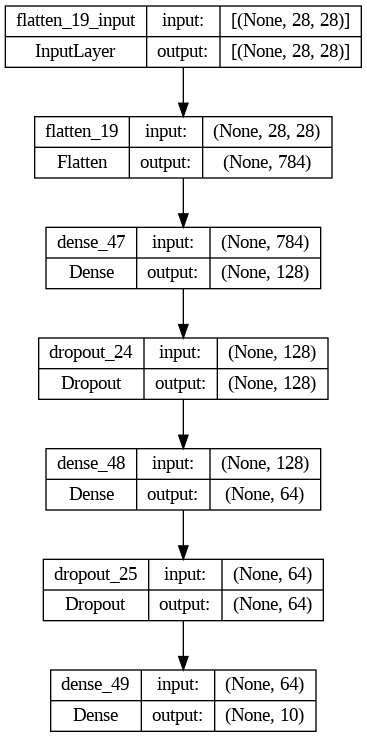

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

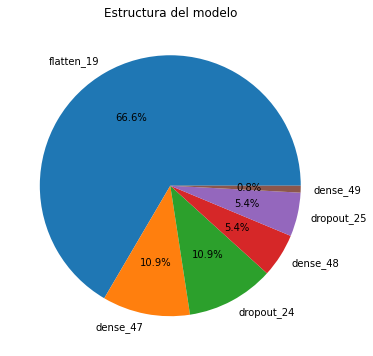

In [ ]:
import matplotlib.pyplot as plt

# Obtener la estructura del modelo
model_layers = [layer.output for layer in model.layers]
layer_names = [layer.name for layer in model.layers]

# Crear el diagrama
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title('Estructura del modelo')
ax.axis('off')
_ = plt.pie([layer.shape[-1] for layer in model_layers], labels=layer_names, autopct='%1.1f%%')
plt.show()

In [ ]:
# Evaluar el rendimiento del modelo en los datos de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Pérdida del modelo en los datos de prueba: {loss:.4f}")
print(f"Precisión del modelo en los datos de prueba: {accuracy:.4f}")

313/313 [==============================] - 1s 2ms/step - loss: 0.1430 - accuracy: 0.9653
Pérdida del modelo en los datos de prueba: 0.1430
Precisión del modelo en los datos de prueba: 0.9653


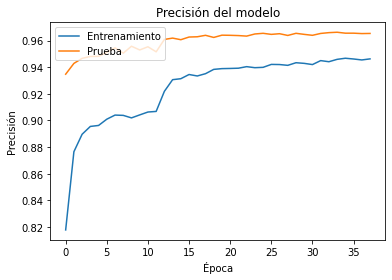

In [ ]:
# Graficar la precisión del modelo durante el entrenamiento
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Precisión del modelo')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Prueba'], loc='upper left')
plt.show()

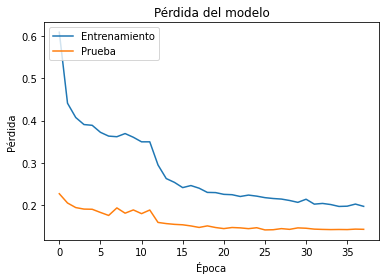

In [ ]:
# Graficar la pérdida del modelo durante el entrenamiento
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Prueba'], loc='upper left')
plt.show()